In [1]:
cd /home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection

/home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection


In [2]:
#Import standard modules
%run lib/__init__.py
%matplotlib inline

### Project 3: Madelon Dataset - Feature Selection + Classification


### Step 3 - Model Selection



In [3]:
modelScores=pd.DataFrame()
pickle_f=Pickle_files()
datafiles=pickle_f.read_datafiles()
#datafiles

In [4]:
X=pd.read_pickle(datafiles['UCI'][2]) #X_train
y=pd.read_pickle(datafiles['UCI'][4]) #y_train

In [5]:
bf=pickle_f.load_UCIBF()
bf.sort_values('best_test_score', ascending=False)

,best_params,best_test_score,dataset,featSelect,model,n_featSelect
4,{'sfm__estimator': LogisticRegression(C=1000.0...,0.886058,UCI,"[28, 48, 105, 128, 281, 318, 336, 338, 378, 43...",SFM_KNN,11
0,{'skb__k': 10},0.871154,UCI,"[48, 64, 105, 128, 241, 336, 338, 378, 442, 475]",SKB_KNN,10
7,"{'sfm__estimator': LogisticRegression(C=100.0,...",0.862500,UCI,"[28, 48, 105, 128, 281, 318, 336, 338, 378, 43...",SFM_SVC,11
8,"{'rfe__estimator': LogisticRegression(C=100, c...",0.849038,UCI,"[28, 48, 105, 128, 153, 241, 338, 378, 433, 451]",RFE_KNN,10
6,"{'sfm__estimator': LogisticRegression(C=100.0,...",0.820192,UCI,"[28, 48, 105, 128, 281, 318, 336, 338, 378, 43...",SFM_DT,11
11,"{'rfe__estimator': LogisticRegression(C=100, c...",0.802404,UCI,"[28, 48, 105, 128, 153, 241, 338, 378, 433, 451]",RFE_SVC,10
3,{'skb__k': 10},0.800481,UCI,"[48, 64, 105, 128, 241, 336, 338, 378, 442, 475]",SKB_SVC,10
2,{'skb__k': 15},0.787019,UCI,"[48, 64, 105, 128, 241, 323, 336, 338, 378, 38...",SKB_DT,15
10,"{'rfe__estimator': LogisticRegression(C=1000, ...",0.778365,UCI,"[28, 48, 105, 128, 153, 241, 338, 378, 433, 451]",RFE_DT,10
5,"{'sfm__estimator': LogisticRegression(C=100.0,...",0.605769,UCI,"[48, 105, 128, 281, 318, 338, 378, 433, 451]",SFM_LR,9


In [6]:
bf['featSelect'].value_counts()

[48, 105, 128, 281, 318, 338, 378, 433, 451]                                 1
[28, 48, 105, 128, 153, 241, 338, 378, 433, 451]                             1
[64, 128, 241, 336, 475]                                                     1
[28, 48, 105, 128, 153, 241, 338, 378, 433, 451]                             1
[48, 64, 105, 128, 241, 336, 338, 378, 442, 475]                             1
[28, 48, 105, 128, 281, 318, 336, 338, 378, 433, 451]                        1
[28, 48, 105, 128, 153, 241, 338, 378, 433, 451]                             1
[28, 48, 105, 128, 281, 318, 336, 338, 378, 433, 451]                        1
[28, 48, 105, 128, 153, 241, 338, 378, 433, 451]                             1
[48, 64, 105, 128, 241, 336, 338, 378, 442, 475]                             1
[48, 64, 105, 128, 241, 323, 336, 338, 378, 384, 442, 453, 472, 475, 493]    1
[28, 48, 105, 128, 281, 318, 336, 338, 378, 433, 451]                        1
Name: featSelect, dtype: int64

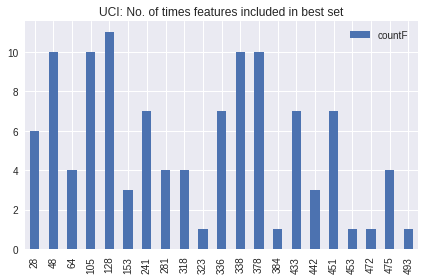

In [7]:
from collections import Counter
allf=[]

for i in range(11):
    allf=allf+bf['featSelect'][i].tolist()

con=Counter()
for n in allf :
    con[n]+=1

feat_count=pd.DataFrame(con, index=['countF'])
feat_count.T.plot.bar()
plt.title('UCI: No. of times features included in best set')
plt.tight_layout()
plt.savefig('./images/03-Model_Selection-uci-bf.jpg')

In [10]:
#best features selected
mask_all=feat_count.T.countF>0
sbf_all=(feat_count.T[mask_all].index)

mask_10=feat_count.T.countF>5
sbf_ten=(feat_count.T[mask_10].index)

mask_5=feat_count.T.countF>8
sbf_5=(feat_count.T[mask_5].index)
sbf_ten

Int64Index([28, 48, 105, 128, 241, 336, 338, 378, 433, 451], dtype='int64')

Checkout PCA -  use all

In [75]:
X_L=X[sbf_all].shape[1]
pca=PCA()
Xp=pca.fit_transform(X[sbf_all])
Xp_df=pd.DataFrame(Xp, columns=['PC'+str(1+i) for i in range(X_L)])
Xp_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,3345.232960,125.391746,-204.272349,-56.129061,12.978430,35.098953,46.080005,-11.687244,1.001170,0.251659,...,3.450901,-0.966348,-4.764265,-0.120740,1.644962,-0.119176,0.535242,0.363315,0.001256,0.000017
1,1096.105355,-132.404929,118.951407,-25.963087,-7.740128,17.996791,-3.731786,8.607394,0.437322,-12.003320,...,0.657737,4.970339,0.645297,1.229809,1.250082,-1.353485,0.128684,0.114897,-0.000264,-0.000002
2,242.164088,-377.078623,26.129423,-105.193884,2.427110,-1.063293,-16.031879,11.594542,-7.563168,-0.448032,...,-0.032229,3.708011,-3.606432,0.568989,-1.951108,2.802815,-0.046306,0.422640,0.002104,-0.000002
3,417.234643,535.607467,-20.202862,19.331534,-26.394719,-6.015579,-31.823052,1.871739,-17.847153,1.010433,...,-4.008729,-2.636186,-0.603682,0.975198,1.854439,2.231999,-1.000588,0.670768,0.000926,0.000004
4,468.412369,-834.175668,8.376547,-19.875987,-23.909982,4.429505,17.366442,-6.445525,-18.535454,-2.334314,...,-4.954270,3.660652,-0.122118,-2.694917,-1.111385,0.303497,0.355860,-0.478292,-0.000071,0.000008


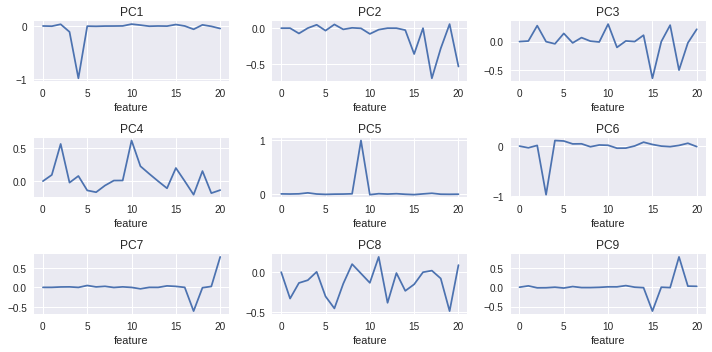

In [77]:
fig=plt.figure(figsize=(10,5))
for i in range(9):
    fig.add_subplot(3,3,1+i)
    plt.plot(pca.components_[i])
    plt.xlabel('feature')
    plt.title('PC'+str(i+1))
    
plt.tight_layout()
plt.savefig('./images/03-Model_Selection-uci-pc.jpg')

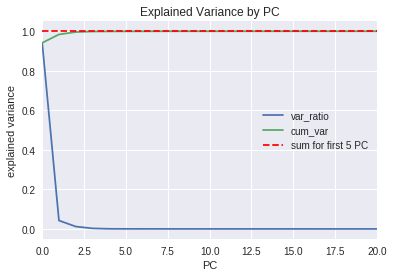

In [78]:
Xp_var=pd.DataFrame(pca.explained_variance_ratio_, columns=['var_ratio'])
Xp_var['cum_var']=Xp_var.var_ratio.cumsum()
Xp_var.sort_values('var_ratio',ascending=False).plot()
plt.axhline(Xp_var.loc[5,'cum_var'],c='r',ls='--', label='sum for first 5 PC')
plt.ylabel('explained variance')
plt.xlabel('PC')
plt.legend()
plt.title('Explained Variance by PC')
plt.savefig('./images/03-Model_Selection-uci-pc_var.jpg')

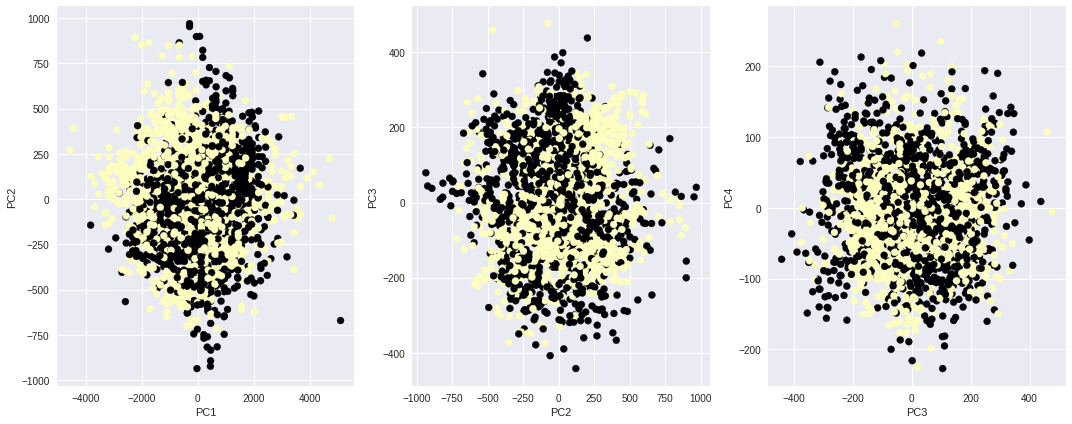

In [79]:
fig=plt.figure(figsize=(15,6))
fig.add_subplot(1,3,1)
plt.scatter(Xp_df.PC1,Xp_df.PC2, c=y, cmap='magma')
plt.xlabel('PC1')
plt.ylabel('PC2')
fig.add_subplot(1,3,2)
plt.scatter(Xp_df.PC2,Xp_df.PC3, c=y, cmap='magma')
plt.xlabel('PC2')
plt.ylabel('PC3')
fig.add_subplot(1,3,3)
plt.scatter(Xp_df.PC3,Xp_df.PC4, c=y, cmap='magma')
plt.xlabel('PC3')
plt.ylabel('PC4')
fig.tight_layout()
plt.savefig('./images/03-Model_Selection-uci-pc_corr.jpg')

### 2. Choose best model


In [80]:
def sbf_benchmark_grs(X,y,clf, param_clf):
    '''build pipelines for each classifier '''
    
    
    pipe=Pipeline(steps=[('scaler' , StandardScaler()),
                         ('clf' , clf)
                            ])
        
    grsCV=GridSearchCV(pipe,param_grid=param_clf,n_jobs=-1, verbose=1,\
                           cv=StratifiedShuffleSplit(n_splits=5, test_size=.2))
                          
    grsCV.fit(X,y.squeeze())
    
    
    return pd.DataFrame(grsCV.cv_results_)

In [81]:
def sbf_benchmark_grs_pc(X,y,clf, param_clf):
    '''build pipelines for each classifier '''
    
    
    pipe=Pipeline(steps=[('scaler' , StandardScaler()),
                         ('pca' , PCA()),
                         ('clf' , clf)
                            ])
        
    grsCV=GridSearchCV(pipe,param_grid=param_clf,n_jobs=-1, verbose=1,\
                           cv=StratifiedShuffleSplit(n_splits=5, test_size=.2))
                          
    grsCV.fit(X,y.squeeze())
    
    
    return pd.DataFrame(grsCV.cv_results_)

In [82]:
def run_models(ds, X , y, clf ,param_clf,pca=0 ):
    
    model_score=pd.DataFrame()
    masks={'all':sbf_all, 'top5':sbf_5 ,'top10': sbf_ten}
    
    for i,m in tqdm(masks.items()):
        if pca==0:
            results=sbf_benchmark_grs(X[m],y,clf, param_clf)
        else:
            results=sbf_benchmark_grs_pc(X[m],y,clf, param_clf)
        
        results['Dataset']=ds
        results['featset']=i
        
        if model_score.shape==(0,0):
            model_score=results
        else:
            model_score=pd.concat([model_score,results],axis=0, ignore_index=True)
    
    return model_score

### 3. Score datasets

In [83]:
model_scores=pd.DataFrame()

Optimize KNN

In [84]:
clfk=KNeighborsClassifier()
param_clfk=({'clf__n_neighbors': np.arange(1,10,1)})


In [85]:
%%time
ds='UCI_KNN'
results=run_models(ds,X,y,clfk, param_clfk,pca=0)

model_scores=results

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.1s finished
 33%|███▎      | 1/3 [00:02<00:04,  2.45s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
 67%|██████▋   | 2/3 [00:03<00:01,  1.63s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.7s finished
100%|██████████| 3/3 [00:04<00:00,  1.46s/it]

CPU times: user 480 ms, sys: 100 ms, total: 580 ms
Wall time: 4.4 s


In [86]:
%%time
ds='UCI_KNN_PC'
results=run_models(ds,X,y,clfk, param_clfk,pca=1)

model_scores=pd.concat([model_scores,results],axis=0, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.5s finished
 33%|███▎      | 1/3 [00:02<00:05,  2.83s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
 67%|██████▋   | 2/3 [00:03<00:01,  1.80s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished
100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

CPU times: user 480 ms, sys: 260 ms, total: 740 ms
Wall time: 5.17 s


Optimize Logistic Regression

In [87]:
clfLr=LogisticRegression(random_state=42)
param_clfLr=({'clf__C':np.logspace(-3,3,7),
             'clf__penalty':['l2','l1']})

In [88]:
%%time
ds='UCI_LogR'
results=run_models(ds,X,y,clfLr, param_clfLr,pca=0)

model_scores=pd.concat([model_scores,results],axis=0, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.7s finished
 33%|███▎      | 1/3 [00:02<00:04,  2.05s/it]

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
 67%|██████▋   | 2/3 [00:02<00:01,  1.43s/it]

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished
100%|██████████| 3/3 [00:04<00:00,  1.50s/it]

CPU times: user 540 ms, sys: 80 ms, total: 620 ms
Wall time: 4.54 s


In [89]:
%%time
ds='UCI_LogR_PC'
results=run_models(ds,X,y,clfLr, param_clfLr,pca=1)

model_scores=pd.concat([model_scores,results],axis=0, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.2s finished
 33%|███▎      | 1/3 [00:01<00:03,  1.65s/it]

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
 67%|██████▋   | 2/3 [00:02<00:01,  1.23s/it]

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.9s finished
100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

CPU times: user 620 ms, sys: 260 ms, total: 880 ms
Wall time: 3.78 s


Optimize DecisionTree

In [90]:
clfDt=DecisionTreeRegressor(random_state=42)
param_clfDt=({'clf__max_depth':[5,6,7,8,9,10,None],
             'clf__min_samples_split':[2,3,4]})

In [91]:
%%time
ds='UCI_Dt'
results=run_models(ds,X,y,clfDt, param_clfDt,pca=0)

model_scores=pd.concat([model_scores,results],axis=0, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    1.2s finished
 33%|███▎      | 1/3 [00:01<00:03,  1.53s/it]

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.5s finished
 67%|██████▋   | 2/3 [00:02<00:01,  1.22s/it]

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done  98 out of 105 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.8s finished
100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

CPU times: user 580 ms, sys: 120 ms, total: 700 ms
Wall time: 3.64 s


In [92]:
%%time
ds='UCI_Dt_PC'
results=run_models(ds,X,y,clfDt, param_clfDt,pca=1)

model_scores=pd.concat([model_scores,results],axis=0, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    3.3s finished
 33%|███▎      | 1/3 [00:03<00:07,  3.71s/it]

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.7s finished
 67%|██████▋   | 2/3 [00:04<00:02,  2.31s/it]

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    1.9s finished
100%|██████████| 3/3 [00:06<00:00,  2.30s/it]

CPU times: user 730 ms, sys: 300 ms, total: 1.03 s
Wall time: 6.96 s


Optimize SVC

In [93]:
clfSVC=SVC(random_state=42)
#param_clfSVC=({'clf__C':np.logspace(-3,3,7),
#              'clf__kernel':['linear','poly','rbf', 'sigmoid']})
param_clfSVC=({'clf__C':range(10,100,10),
               'clf__kernel':['rbf']})

In [94]:
%%time
ds='UCI_SVC'
results=run_models(ds,X,y,clfSVC, param_clfSVC,pca=0)

model_scores=pd.concat([model_scores,results],axis=0, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.8s finished
 33%|███▎      | 1/3 [00:05<00:11,  5.63s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.6s finished
 67%|██████▋   | 2/3 [00:10<00:05,  5.38s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.3s finished
100%|██████████| 3/3 [00:14<00:00,  4.91s/it]

CPU times: user 1.12 s, sys: 160 ms, total: 1.28 s
Wall time: 14.8 s


In [95]:
%%time
ds='UCI_SVC_PC'
results=run_models(ds,X,y,clfSVC, param_clfSVC,pca=1)

model_scores=pd.concat([model_scores,results],axis=0, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.8s finished
 33%|███▎      | 1/3 [00:07<00:15,  7.58s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.6s finished
 67%|██████▋   | 2/3 [00:12<00:06,  6.43s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.1s finished
100%|██████████| 3/3 [00:17<00:00,  5.83s/it]

CPU times: user 1.14 s, sys: 320 ms, total: 1.46 s
Wall time: 17.5 s


In [113]:
model_scores.sort_index(axis=1).sort_values('mean_test_score', ascending=False).head(10).T

,6,8,7,49,33,283,286,51,290,289
Dataset,UCI_KNN,UCI_KNN,UCI_KNN,UCI_KNN_PC,UCI_KNN_PC,UCI_SVC,UCI_SVC,UCI_KNN_PC,UCI_SVC,UCI_SVC
featset,all,all,all,top10,all,top10,top10,top10,top10,top10
mean_fit_time,0.00611305,0.0081089,0.00575686,0.0193478,0.0266919,0.145817,0.197232,0.0264767,0.241068,0.234981
mean_score_time,0.0414191,0.0309555,0.0373709,0.00446305,0.024127,0.01844,0.0204186,0.0176682,0.0110964,0.0159905
mean_test_score,0.897115,0.894712,0.894231,0.892308,0.891346,0.890865,0.889423,0.889423,0.889423,0.888942
mean_train_score,0.922115,0.915505,0.914543,0.928125,0.921635,0.927524,0.943029,0.91863,0.950962,0.949279
param_clf__C,NaN,NaN,NaN,NaN,NaN,20,50,NaN,90,80
param_clf__kernel,NaN,NaN,NaN,NaN,NaN,rbf,rbf,NaN,rbf,rbf
param_clf__max_depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_clf__min_samples_split,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
model_scores.to_pickle('./data/pickle_data/UCI_model_scores')

In [99]:
m_check=pd.read_pickle('./data/pickle_data/UCI_model_scores')

In [100]:
m_check.equals(model_scores)

True

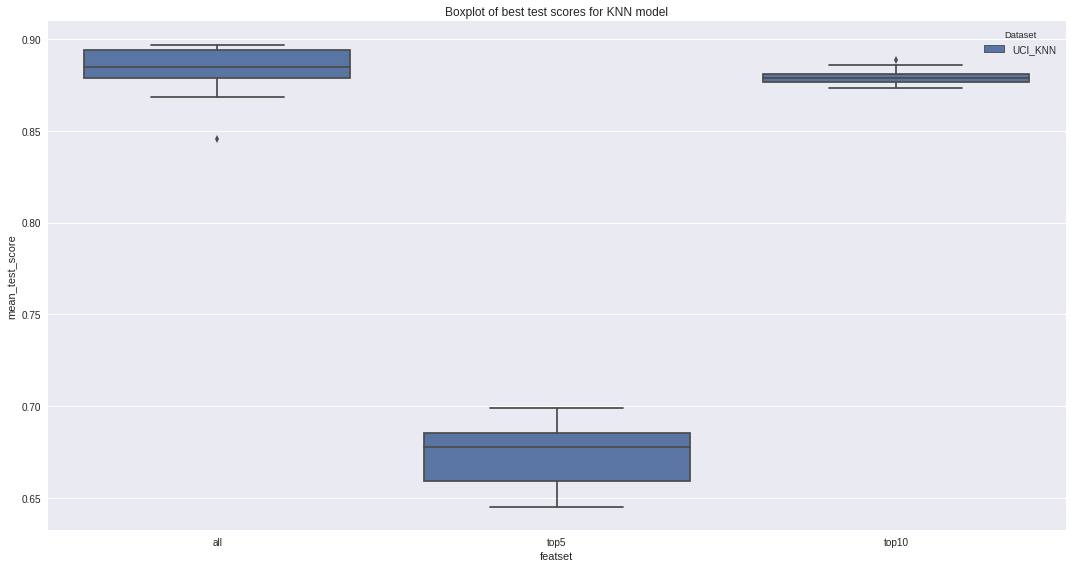

In [112]:
gmask=model_scores.Dataset=='UCI_KNN'
fig=plt.figure(figsize=(15,8))
sns.boxplot(x=model_scores[gmask]['featset'], y=model_scores[gmask]['mean_test_score'],\
            hue=model_scores[gmask]['Dataset'])
plt.title('Boxplot of best test scores for KNN model')
plt.tight_layout()
plt.savefig('./images/03-Model_Selection-uci-topmodel_boxplot.jpg')

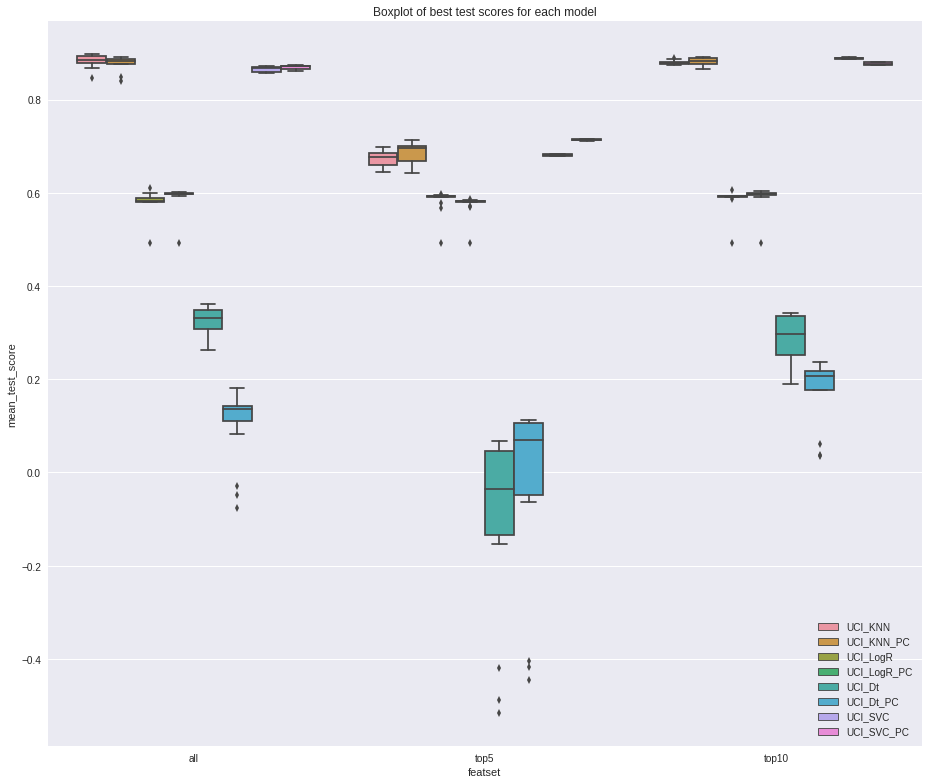

In [110]:
fig=plt.figure(figsize=(13,11))
sns.boxplot(x=model_scores['featset'], y=model_scores['mean_test_score'],\
            hue=model_scores['Dataset'])
plt.legend(loc=4)
plt.title('Boxplot of best test scores for each model')
plt.tight_layout()
plt.savefig('./images/03-Model_Selection-uci-modelscores_boxplot.jpg')